# Quantum Teleportation

## Teleportation of pure states

Let's start this off with the standard protocol that you all studied, for Teleportation, which in some sense is kind of the inverse of Super Dense Coding, sending two bits of information in order to obtain the state of the other person's qubit (which is now their own qubit, by teleportation)

Explain the protocol in your own words and also code up the circuit for the same (measurements can be kept at the end as well, even though that's not what's happening in the protocol)

{'010': 1}


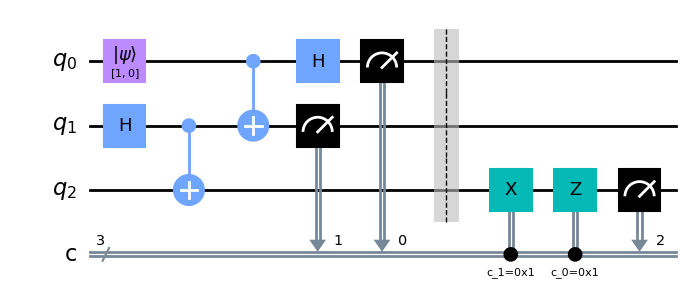

In [51]:
from qiskit import QuantumCircuit, Aer, execute

# Create a quantum circuit with 3 qubits and 3 classical bits
qc = QuantumCircuit(3, 3)

# Apply the necessary gates to initialize the qubit to be teleported
qc.initialize([1, 0], 0)  # Initialize qubit 0 in the state |0>
qc.h(1)                   # Apply H-gate to qubit 1

# Entangle qubit 1 (Alice's) with qubit 2 (Bob's)
qc.cx(1, 2)               # Apply CNOT gate with qubit 1 as control and qubit 2 as target

# Perform Bell state measurement
qc.cx(0, 1)               # Apply CNOT gate with qubit 0 as control and qubit 1 as target
qc.h(0)                   # Apply H-gate to qubit 0
qc.measure([0, 1], [0, 1])  # Measure qubits 0 and 1 and store the outcomes in classical bits 0 and 1

# Apply operations on Bob's qubit based on the measurement outcomes
qc.barrier()              # Add a barrier for clarity
qc.x(2).c_if(1, 1)        # Apply X-gate to qubit 2 if classical bit 1 is 1
qc.z(2).c_if(0, 1)        # Apply Z-gate to qubit 2 if classical bit 0 is 1

# Measure Bob's qubit
qc.measure(2, 2)          # Measure qubit 2 and store the outcome in classical bit 2

# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1)
result = job.result()
counts = result.get_counts()

print(counts)
qc.draw('mpl')


## Mixed States

Let's take this further by considering the problem of teleporting a mixed state from one person to another. 

It should be straightforward to see that you can't directly use the Quantum Teleportation Protocol, since it is assumed that the state to be teleported has a state $$ \alpha|0\rangle + \beta|1\rangle $$ which is a pure state vector.

Starting with a concrete example, let's look at transporting the qubit with density matrix $$ \frac{2}{3}|0\rangle \langle 0| + \frac{1}{3}|1\rangle \langle 1| $$ 

Can you design a protocol that uses Quantum Teleportation as a component to transport this mixed state from one person to another? Feel free to use ancilla qubits (could be qubits that are prepared in the states $|0\rangle$ or $|1\rangle$)

Hint : Maybe Schmidt Decompositions and Purifications would come in handy

Optional : You could code up the circuit in Qiskit as well

{'10110': 1}


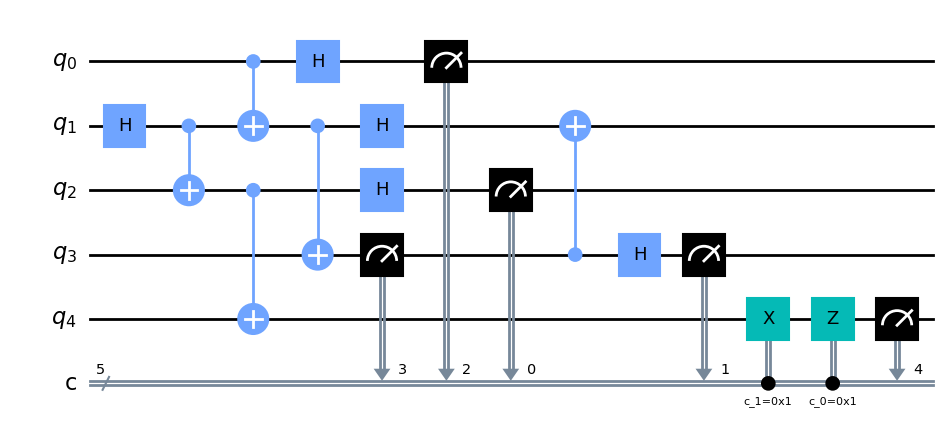

In [53]:
from qiskit import QuantumCircuit, Aer, execute
import numpy as np

coefficients = [2/3, 1/3]  # Coefficients of the mixed state
norm = np.sqrt(np.sum(np.square(coefficients)))  # Calculate the normalization factor

normalized_coeffs = [coeff / norm for coeff in coefficients]  # Normalize the coefficients

qc.initialize(normalized_coeffs, 0)  # Initialize qubit 0 in the normalized mixed state

# Create a quantum circuit with 5 qubits and 5 classical bits
qc = QuantumCircuit(5, 5)

# Apply the necessary gates to initialize the qubit to be teleported # Initialize qubit 0 in the mixed state (density matrix)
qc.h(1)                             # Apply H-gate to qubit 1

# Entangle qubit 1 (Alice's) with qubit 2 (Bob's)
qc.cx(1, 2)                         # Apply CNOT gate with qubit 1 as control and qubit 2 as target

# Purification step
qc.cx(0, 1)                         # Apply CNOT gate with qubit 0 as control and qubit 1 as target
qc.h(0)                             # Apply H-gate to qubit 0
qc.cx(1, 3)                         # Apply CNOT gate with qubit 1 as control and ancillary qubit 3 as target
qc.h(1)                             # Apply H-gate to qubit 1
qc.measure([0, 3], [2, 3])          # Measure qubits 0 and 3 and store the outcomes in classical bits 2 and 3

# Standard Quantum Teleportation
qc.cx(3, 1)                         # Apply CNOT gate with ancillary qubit 3 as control and qubit 1 as target
qc.h(3)                             # Apply H-gate to ancillary qubit 3
qc.cx(2, 4)                         # Apply CNOT gate with qubit 2 as control and ancillary qubit 4 as target
qc.h(2)                             # Apply H-gate to qubit 2
qc.measure([2, 3], [0, 1])          # Measure qubits 2 and 3 and store the outcomes in classical bits 0 and 1

# Apply operations on Bob's qubit based on the measurement outcomes
qc.x(4).c_if(1, 1)                  # Apply X-gate to ancillary qubit 4 if classical bit 1 is 1
qc.z(4).c_if(0, 1)                  # Apply Z-gate to ancillary qubit 4 if classical bit 0 is 1

# Measure Bob's qubit
qc.measure(4, 4)                    # Measure ancillary qubit 4 and store the outcome in classical bit 4

# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1)
result = job.result()
counts = result.get_counts()

print(counts)
qc.draw('mpl')
